In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")  # Replace with actual dataset path

In [5]:
# 1. Check for null values and handle them
df.isnull().sum()
df.dropna(inplace=True)  # Drop rows with missing values


In [6]:
# 2. Check for duplicate rows and remove them
df.duplicated().sum()
df.drop_duplicates(inplace=True)


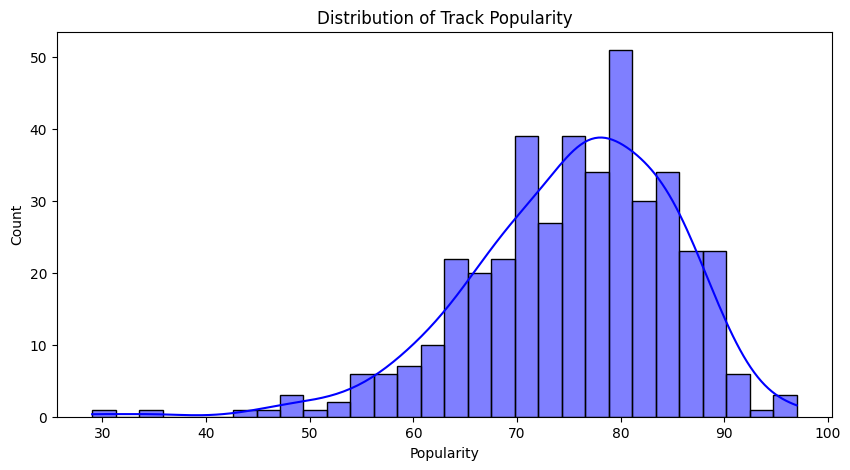

In [7]:
# 3. What is the distribution of popularity among the tracks? Visualize using a histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


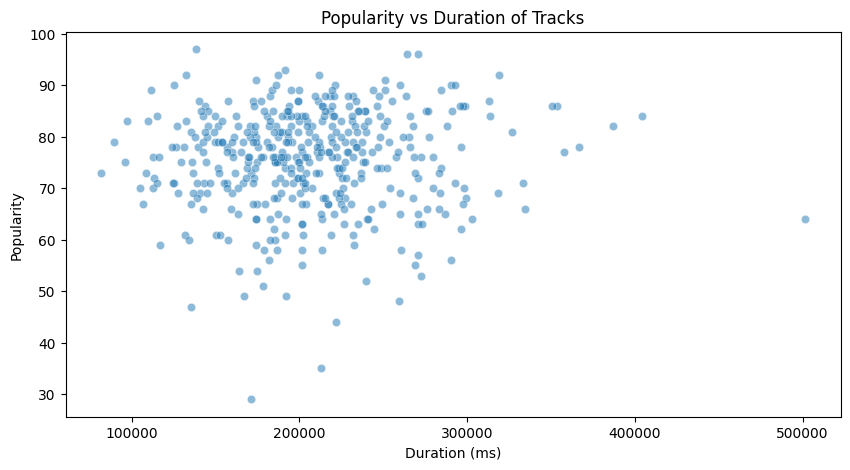

In [8]:
# 4. Is there any relationship between the popularity and duration of tracks? Visualize using a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.5)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


<ipython-input-9-63ca0db4f933>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


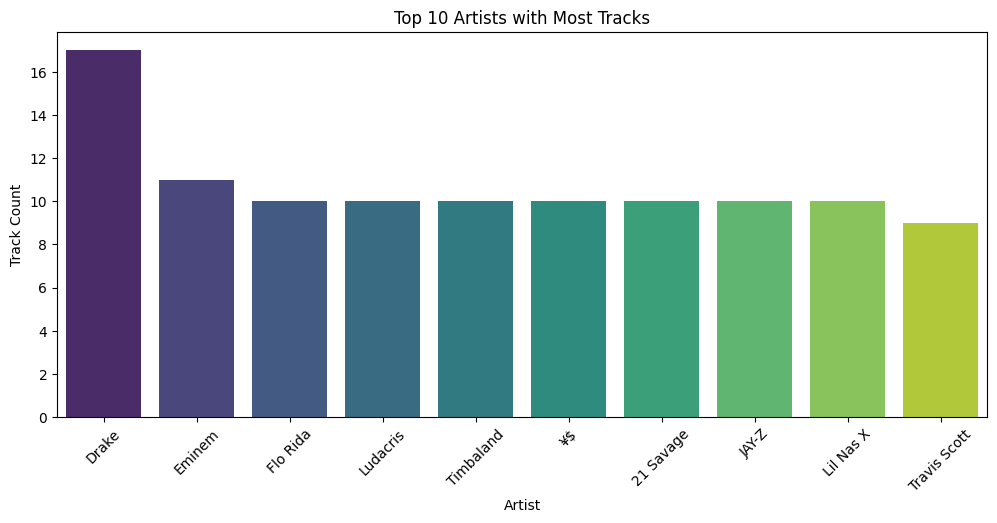

In [9]:
# 5. Which artist has the highest number of tracks in the dataset? Display the count using a countplot
plt.figure(figsize=(12, 5))
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.show()


In [10]:
# 6. What are the top 5 least popular tracks? Provide the artist name and track name for each
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [11]:
# 7. Among the top 5 most popular artists, which artist has the highest popularity on average?
top_artists_avg_popularity = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Top 5 Most Popular Artists by Average Popularity:")
print(top_artists_avg_popularity)


Top 5 Most Popular Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [12]:
# 8. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_tracks = df.loc[df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
top_tracks = top_tracks[top_tracks['Artist'].isin(top_artists_avg_popularity.index)]
print("Most Popular Tracks of Top 5 Artists:")
print(top_tracks)


Most Popular Tracks of Top 5 Artists:
           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


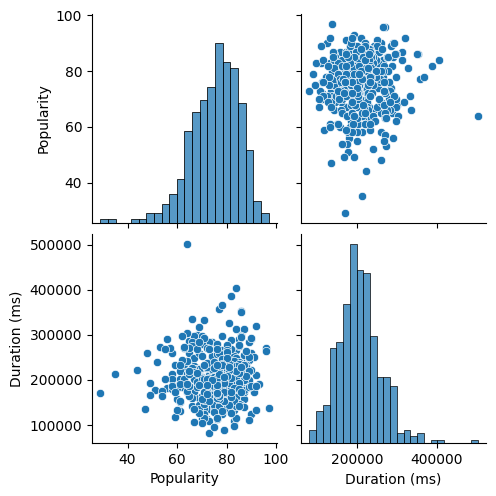

In [13]:
# 9. Visualize relationships between multiple numerical variables using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


<ipython-input-14-4883b4499fbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_artists.index)], palette='coolwarm')


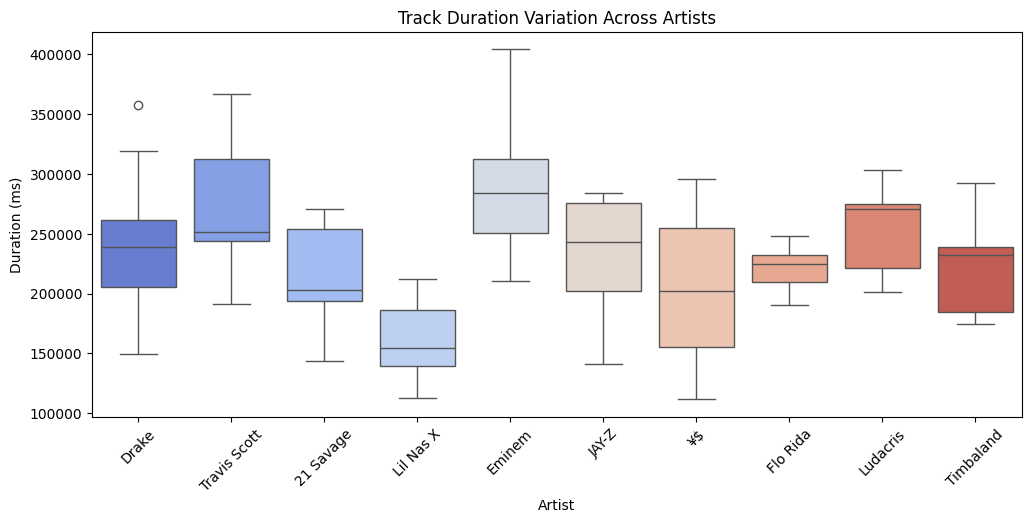

In [14]:
# 10. Does the duration of tracks vary significantly across different artists? Visualize using a box plot
plt.figure(figsize=(12, 5))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_artists.index)], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Track Duration Variation Across Artists')
plt.show()

<ipython-input-15-9241eeae11b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_artists.index)], palette='magma')


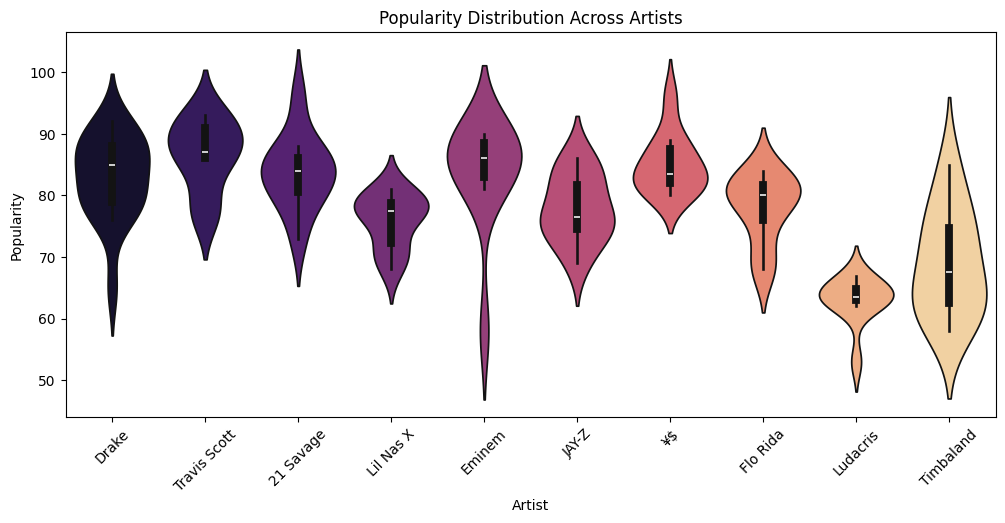

In [15]:

# 11. How does the distribution of track popularity vary for different artists? Visualize using a violin plot
plt.figure(figsize=(12, 5))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_artists.index)], palette='magma')
plt.xticks(rotation=45)
plt.title('Popularity Distribution Across Artists')
plt.show()
